# **Persiapan**

**Menyiapkan library yang dibutuhkan**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load dataset
df = pd.read_csv("/content/datastudent.csv", delimiter=";")
print(df.head())

   Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0            1   

# **Data Understanding**

In [ ]:
# Cek informasi dataset
print("Dataset Info:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         442

In [ ]:
#Cek nama kolom
print(df.columns)

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

<ipython-input-5-d4d32dadfc65>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=df, palette='coolwarm')


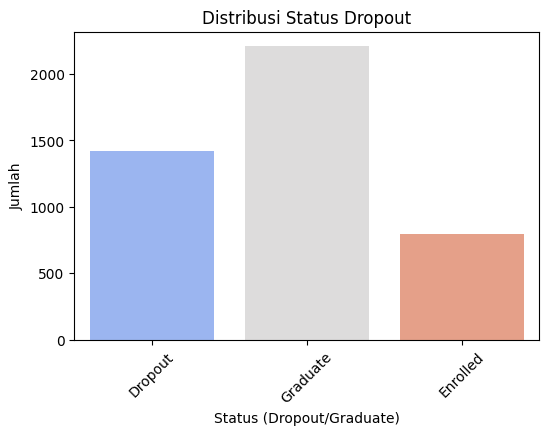

In [ ]:
# Cek distribusi variabel target
plt.figure(figsize=(6, 4))
sns.countplot(x='Status', data=df, palette='coolwarm')
plt.title("Distribusi Status Dropout")
plt.xlabel("Status (Dropout/Graduate)")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Cek statistik deskriptif
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
       Marital_status  Application_mode  Application_order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime_evening_attendance  Previous_qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.0000

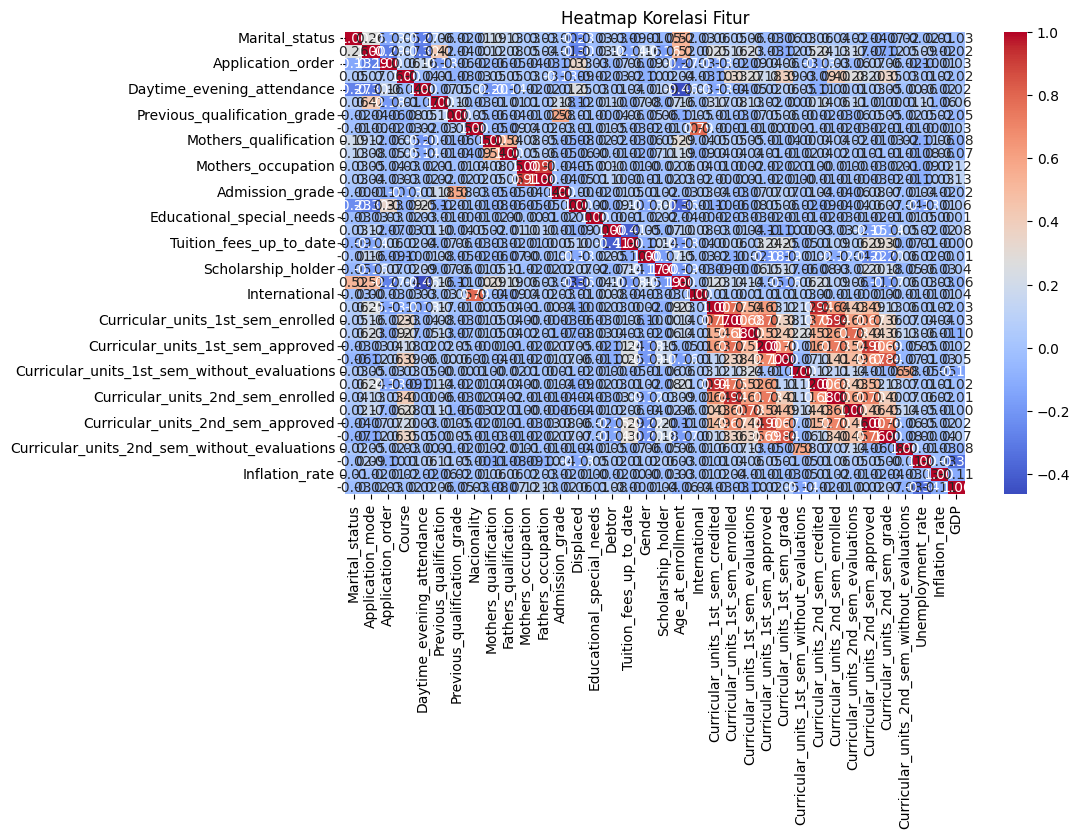

In [ ]:
# Ambil hanya kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# Visualisasi korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Fitur")
plt.show()


In [ ]:
print(df.dtypes)

Marital_status                                    int64
Application_mode                                  int64
Application_order                                 int64
Course                                            int64
Daytime_evening_attendance                        int64
Previous_qualification                            int64
Previous_qualification_grade                    float64
Nacionality                                       int64
Mothers_qualification                             int64
Fathers_qualification                             int64
Mothers_occupation                                int64
Fathers_occupation                                int64
Admission_grade                                 float64
Displaced                                         int64
Educational_special_needs                         int64
Debtor                                            int64
Tuition_fees_up_to_date                           int64
Gender                                          

# **Data Preprocessing**

In [ ]:
# Cek kembali missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values:\n", missing_values)

Missing values:
 Series([], dtype: int64)


In [ ]:
# Encode kolom target 'Status'
df['Status'] = df['Status'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})

# One-Hot Encoding untuk semua fitur kategori
categorical_cols = ['Gender', 'Daytime_evening_attendance', 'Course', 'Mothers_occupation', 'Fathers_occupation', 'Displaced', 'Scholarship_holder', 'International', 'Tuition_fees_up_to_date']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
import pickle
# Pisahkan fitur & target
X = df.drop(columns=['Status'])
y = df['Status']

# Simpan daftar fitur setelah encoding
selected_features = X.columns.tolist()
with open('selected_features.pkl', 'wb') as file:
    pickle.dump(selected_features, file)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

#Oversampling dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Simpan scaler agar bisa dipakai di Streamlit
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)
print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")

Train size: 5301, Test size: 1326


# **Modelling**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Inisialisasi model
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Training model
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

print("Model training selesai. Siap untuk evaluasi!")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:08:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model training selesai. Siap untuk evaluasi!


# **Evaluation**

=== Logistic Regression ===
Accuracy: 0.7888
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.72      0.77       444
           1       0.75      0.73      0.74       439
           2       0.80      0.92      0.85       443

    accuracy                           0.79      1326
   macro avg       0.79      0.79      0.79      1326
weighted avg       0.79      0.79      0.79      1326



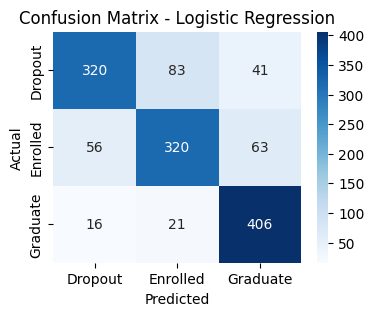

=== Random Forest ===
Accuracy: 0.8190
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.76      0.82       444
           1       0.78      0.82      0.80       439
           2       0.80      0.88      0.84       443

    accuracy                           0.82      1326
   macro avg       0.82      0.82      0.82      1326
weighted avg       0.82      0.82      0.82      1326



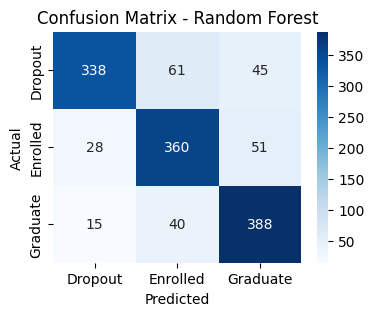

=== XGBoost ===
Accuracy: 0.8348
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84       444
           1       0.80      0.83      0.81       439
           2       0.82      0.88      0.85       443

    accuracy                           0.83      1326
   macro avg       0.84      0.83      0.83      1326
weighted avg       0.84      0.83      0.83      1326



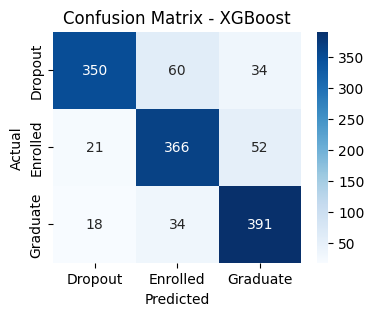

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prediksi pada test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluasi Model
models = {
    "Logistic Regression": y_pred_log_reg,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb
}

for name, y_pred in models.items():
    print(f"=== {name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Dropout", "Enrolled", "Graduate"],
                yticklabels=["Dropout", "Enrolled", "Graduate"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

In [ ]:
import pickle

# Simpan model XGBoost ke file .pkl
with open("xgboost_student_status.pkl", "wb") as file:
    pickle.dump(xgb_clf, file)

print("Model XGBoost berhasil disimpan sebagai 'xgboost_student_status.pkl'!")

Model XGBoost berhasil disimpan sebagai 'xgboost_student_status.pkl'!
